# Pandas
(documentação oficial: https://pandas.pydata.org/pandas-docs/stable/)

Kit de ferramentas de código aberto de análise de dados para Python.

O **pandas** é um pacote que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados **relacionais** ou **rotulados** fáceis e intuitivos. O objetivo é ser o alicerce para a análise prática de dados do mundo real em Python. 

O **pandas** é adequado para análise de muitos tipos diferentes de dados: 
- Dados tabulares com colunas de tipos heterogêneos, como numa tabela SQL ou planilha do Excel.   
- Dados de séries temporais ordenados e não ordenados (não necessariamente de frequência fixa).  
- Dados de matriz arbitrária (homogeneamente digitados ou heterogêneos) com rótulos de linha e coluna.  
- Qualquer outra forma de conjuntos de dados observacionais/estatísticos. Os dados realmente não precisam ser rotulados para serem colocados em uma estrutura de dados de pandas.  

Nossos objetivos em relação ao pacote **pandas** são: 
- Apresentar as estruturas de dados _DataFrame_ e _Series_.
- Acessar e manipular dados num _DataFrame_ e _Series_. 
- Importar dados CSV  para um _DataFrame_. 
- Reindexar um _DataFrame_ para misturar dados.

In [37]:
import pandas as pd
pd.__version__

'0.24.1'

## Estruturas de Dados: _DataFrame_ e _Serie_

As estruturas de dados primárias no **pandas** são implementadas por duas classes: 

- **DataFrame** que é uma espécie de tabela de dados relacionais, com linhas e colunas nominadas. 
- **Series** que é uma espécie de coleção de dados de coluna única. 

Dimensões | Nome | Descrição  
:---: | :--- | :----
1 | matriz 1D | rotulada de forma homogênea  
2 | DataFrame Geral | Estrutura tabular de tamanho marcado, mutável em 2D, com coluna potencialmente tipificada de forma heterogênea  

A melhor maneira de pensar sobre as estruturas de dados do **pandas** é como contêineres flexíveis para dados de baixa dimensionalidade. Por exemplo, **DataFrame** é um contêiner para **Series** e **Series** é um contêiner para escalares.

Um **DataFrame** contém uma ou mais **Series** e um nome para cada **Series**. 

O **DataFrame** é uma abstração comumente usada na manipulação de dados. Implementações semelhantes existem no **Apache Spark** (mecanismo de análise unificada para processamento de _big data_, com módulos internos para _streaming_, SQL, _Machine Learning_ e processamento de gráficos) e R (ambiente computacional e linguagem de programação especializado em manipulação, análise e visualização gráfica de dados e estatísticas).

Uma maneira de criar uma série é construir um objeto da classe **Series**.   
Por exemplo:

In [38]:
pd.Series(['Curitiba', 'Manaus', 'Porto Velho', 'Natal', 'Goiânia'])

0       Curitiba
1         Manaus
2    Porto Velho
3          Natal
4        Goiânia
dtype: object

Objetos **DataFrame** podem ser criados passando-se os nomes das colunas numa _string_ de mapeamento, do tipo dicionário (`dict`) para suas respectivas séries. Se a série não corresponder em comprimento, os valores omissos serão preenchidos com valores especiais **NaN**.  
Exemplo: Estimativa populacional do Instituto Brasileiro de Geografia e Estatística ([IBGE](https://pt.wikipedia.org/wiki/Lista_de_capitais_do_Brasil_por_popula%C3%A7%C3%A3o)) para 1º de julho de 2018.

In [39]:
capitais = pd.Series(['Curitiba', 'Manaus', 'Porto Velho', 'Natal', 'Goiânia'])
populacao = pd.Series([1917185, 2145444, 519536, 877640, 1495705])
pd.DataFrame({ 'Nome da Cidade': capitais, 'Populacao': populacao })

,Nome da Cidade,Populacao
0,Curitiba,1917185
1,Manaus,2145444
2,Porto Velho,519536
3,Natal,877640
4,Goiânia,1495705


Mas na maioria das vezes, você carrega um arquivo inteiro num **DataFrame**. O exemplo a seguir carrega um arquivo com dados de habitação da Califórnia. Execute a seguinte célula para carregar os dados e criar definições de recursos:

In [40]:
# seu computador precisa ter acesso à Internet...
pop_CA_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")
pop_CA_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


O exemplo acima usou `DataFrame.describe()` para mostrar estatísticas interessantes sobre um **DataFrame**. Outra função útil é o `DataFrame.head()`, que exibe os primeiros registros de um **DataFrame**:

In [41]:
pop_CA_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


<img src='img/mediana.gif' alt='Imagem das medianas de um triângulo.' style='float:right;width:400'>

**Lembrete**:
Mediana: substantivo feminino.
1.	GEOMETRIA: segmento de reta que liga o vértice de um triângulo retângulo ao meio do lado oposto.
2.	ESTATÍSTICA: valor que divide um conjunto de valores ordenados em partes iguais (o valor do meio de um conjunto de dados).


Outra característica poderosa do pacote **pandas** é a representação gráfica. Por exemplo, o método `DataFrame.hist()` permite estudar rapidamente a distribuição de valores numa coluna:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000F989D0E630>]],
      dtype=object)

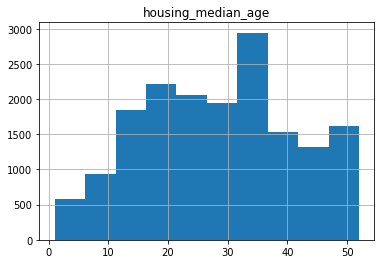

In [42]:
pop_CA_df.hist('housing_median_age')

## Acessando Dados
Você pode acessar dados do **DataFrame** usando operações conhecidas de dicionários/listas do Python:

In [43]:
cidades = pd.DataFrame({ 'Capital': capitais, 'Populacao': populacao })
print(type(cidades['Capital']))

<class 'pandas.core.series.Series'>


In [44]:
cidades['Capital']

0       Curitiba
1         Manaus
2    Porto Velho
3          Natal
4        Goiânia
Name: Capital, dtype: object

In [45]:
cidades

,Capital,Populacao
0,Curitiba,1917185
1,Manaus,2145444
2,Porto Velho,519536
3,Natal,877640
4,Goiânia,1495705


In [46]:
cidades['Capital'][2]

'Porto Velho'

In [47]:
print(type(cidades['Capital'][2]))

<class 'str'>


In [48]:
cidades[0:2]

,Capital,Populacao
0,Curitiba,1917185
1,Manaus,2145444


Além disso, o Pandas oferece uma API extremamente rica para seleção e indexação avançada.

### Manipulando Dados 

Você pode aplicar as operações aritméticas básicas do Python a um objeto **Series**.  
Por exemplo:  

In [49]:
populacao

0    1917185
1    2145444
2     519536
3     877640
4    1495705
dtype: int64

In [50]:
populacao/1000

0    1917.185
1    2145.444
2     519.536
3     877.640
4    1495.705
dtype: float64

Uma série do **pandas** pode ser usada como argumento na maioria das funções do pacote **numpy**:

In [51]:
import numpy as np
np.log(populacao)

0    14.466369
1    14.578857
2    13.160691
3    13.684992
4    14.218108
dtype: float64

Para transformações mais complexas numa coluna única, usa-se o método `Series.apply()`. Assim como a função incorporada `map()` do Python, o método `Series.apply()` aceita como argumento uma função **lambda**, a qual é aplicada a cada valor da série. O exemplo seguinte cria um objeto **Series** que indica se a população da cidade é superior a um milhão:

In [52]:
populacao.apply(lambda pop: pop > 1000000)

0     True
1     True
2    False
3    False
4     True
dtype: bool

Modificar o conteúdo de um **DataFrames** também é simples. Por exemplo, o código seguinte adiciona duas séries a um **DataFrame** existente:

In [53]:
cidades['Area (km2)'] = pd.Series([434.967, 11401.058, 34082.366, 170.298, 739.492])
cidades['Densidade Populacional (hab/km2)'] = cidades['Populacao'] / cidades['Area (km2)']
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2)
0,Curitiba,1917185,434.967,4407.656213
1,Manaus,2145444,11401.058,188.179378
2,Porto Velho,519536,34082.366,15.243543
3,Natal,877640,170.298,5153.554358
4,Goiânia,1495705,739.492,2022.611468


#### Exercício
Modifique a tabela de cidades adicionando uma nova coluna booleana, com valor `True` se, e somente se, as duas opções forem verdadeiras: 
- A cidade tem nome feminino (termina com a letra 'a'). 
- A cidade tem uma área menor que 1000 $km^2$. 

Obs.: As séries booleanas são combinadas usando os operadores bit a bit, em vez dos tradicionais booleanos. Por exemplo, ao executar a lógica ‘e’ use o operador '&' em vez de `and`. 

In [54]:
cidades['Pequena e Feminina'] = (cidades['Area (km2)'] < 1000) & cidades['Capital'].apply(lambda nome: nome.endswith('a'))
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
1,Manaus,2145444,11401.058,188.179378,False
2,Porto Velho,519536,34082.366,15.243543,False
3,Natal,877640,170.298,5153.554358,False
4,Goiânia,1495705,739.492,2022.611468,True


## Índices

Os objetos **Series** e **DataFrame** também definem uma propriedade `index` que designa um valor de identificador para cada item da **Serie** ou linha do **DataFrame**. Por padrão, na construção, o pacote **pandas** atribui valores de índice que refletem a ordenação dos dados de origem. Uma vez criados, os valores do índice são estáveis; isto é, eles não mudam quando os dados são reordenados.

In [55]:
cidades.index

RangeIndex(start=0, stop=5, step=1)

Chame a função `DataFrame.reindex()` para reorganizar manualmente as linhas.  
Por exemplo, o seguinte comando tem o mesmo efeito da classificação por nome da cidade:

In [56]:
cidades

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
1,Manaus,2145444,11401.058,188.179378,False
2,Porto Velho,519536,34082.366,15.243543,False
3,Natal,877640,170.298,5153.554358,False
4,Goiânia,1495705,739.492,2022.611468,True


In [57]:
cidades.reindex([0, 4, 1, 3, 2])

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185,434.967,4407.656213,True
4,Goiânia,1495705,739.492,2022.611468,True
1,Manaus,2145444,11401.058,188.179378,False
3,Natal,877640,170.298,5153.554358,False
2,Porto Velho,519536,34082.366,15.243543,False


Reindexar é uma ótima maneira de embaralhar (randomizar) um **DataFrame**. No exemplo seguinte, pegamos o índice, que é semelhante a um vetor, e o passamos para a função `random.permutation()` do **numpy**, para embaralhar esses valores. Chamar a reindexação com o vetor embaralhado faz com que as linhas do **DataFrame** sejam embaralhadas da mesma maneira.  
Execute a célula seguinte várias vezes!

In [61]:
cidades.reindex(np.random.permutation(cidades.index))

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
3,Natal,877640,170.298,5153.554358,False
0,Curitiba,1917185,434.967,4407.656213,True
2,Porto Velho,519536,34082.366,15.243543,False
1,Manaus,2145444,11401.058,188.179378,False
4,Goiânia,1495705,739.492,2022.611468,True


#### Exercício
O método de reindexação permite valores de índice que não estão nos valores de índice do **DataFrame** original. Experimente e veja o que acontece ao usar índices inexistentes! Por que você acha que isso é permitido?

<u>Solução</u>: Se o vetor de entrada de reindexação incluir valores que não estão nos valores originais do índice **DataFrame**, a função `reindex()` incluirá novas linhas para esses índices "ausentes" e preencherá todas as colunas correspondentes com valores `NaN`:

In [62]:
cidades.reindex([0, 4, 5, 2])

,Capital,Populacao,Area (km2),Densidade Populacional (hab/km2),Pequena e Feminina
0,Curitiba,1917185.0,434.967,4407.656213,True
4,Goiânia,1495705.0,739.492,2022.611468,True
5,NaN,NaN,NaN,NaN,NaN
2,Porto Velho,519536.0,34082.366,15.243543,False


Esse comportamento é desejável porque os índices são geralmente cadeias de caracteres extraídos dos dados reais (consulte a documentação sobre `reindex()` do **pandas** para obter um exemplo em que os valores de índice são nomes de navegadores). 

Nesse caso, permitir índices "ausentes" facilita a reindexação usando uma lista externa, já que não se precisa preocupar com a limpeza da entrada.

<p style="text-align:center;">>>>>> <a href="http:/notebooks/index.ipynb">Volta ao Índice... </a><<<<<